<a href="https://colab.research.google.com/github/jan-kreischer/UZH_ML4NLP/blob/main/Project-01/index_jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 01 - Linear Classification




## Google Drive

In [77]:
# Enable access to files stored in Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [78]:
% cd /content/gdrive/My Drive/ML4NLP

/content/gdrive/My Drive/ML4NLP


## Imports

In [34]:
import csv
import re
import numpy as np
import pandas as pd
from io import StringIO
import requests
import matplotlib.pyplot as plt

In [2]:
url_train_dev = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTOZ2rC82rhNsJduoyKYTsVeH6ukd7Bpxvxn_afOibn3R-eadZGXu82eCU9IRpl4CK_gefEGsYrA_oM/pub?gid=1863430984&single=true&output=tsv'
url_test = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-KNR9nuYatLkSbzSRgpz6Ku1n4TN4w6kKmFLkA6QJHTfQzmX0puBsLF7PAAQJQAxUpgruDd_RRgK7/pub?gid=417546901&single=true&output=tsv'

## Functions

In [3]:
def load_dataset(url):
    r = requests.get(url)
    data = r.content.decode('utf8')
    df = pd.read_csv(StringIO(data), sep='\t')
    df.columns = ['tweet', 'label']
    return df

In [70]:
def data_exploration(df, name=''):
  '''

  '''
  n_labels = len(np.unique(df["label"]))
  df = df.sort_values('label')
  print("{0} contains the columns: {1}".format(name, list(df.keys())))
  print("with a total of {} observations".format(len(df)))
  print("and {} different possible labels".format(n_labels))
  df.describe()
  plt.figure(figsize=(15, 3))
  plt.hist(df["label"], bins=n_labels)
  plt.xticks(rotation=90)
  plt.yscale("log")
  plt.xlabel("Language")
  plt.ylabel("#Occurences")
  plt.show()

In [11]:
train_data = load_dataset(url_train_dev)
test_data = load_dataset(url_test)

In [5]:
df_train_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52675 entries, 0 to 52674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   52675 non-null  object
 1   label   52675 non-null  object
dtypes: object(2)
memory usage: 823.2+ KB


In [7]:
df_train_dev.describe()

,tweet,label
count,52675,52675
unique,52599,69
top,Bom dia,en
freq,7,18508


In [ ]:
len(df_train_def)

Training data contains the columns: ['tweet', 'label']
with a total of 52675 observations
and 69 different possible labels


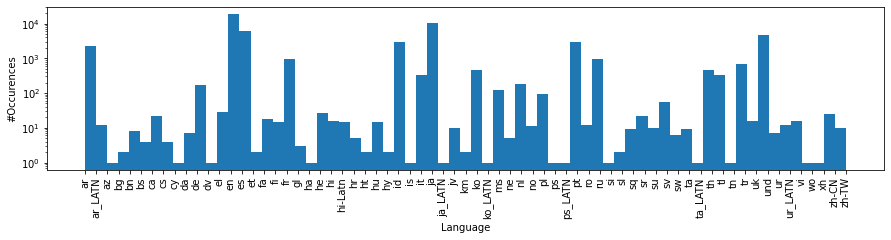

In [66]:
data_exploration(train_data, 'Training data')

In [75]:
english_tweets = train_data[train_data['label'] == 'de']
english_tweets.head()

,tweet,label
2260,"@hmjahnel guten morgen, der herr :)",de
2261,@SkaKeller @GreensEP @Piratenpartei @JanAlbrec...,de
2262,"Ich habe 16,100 Goldmünzen gesammelt! http://t...",de
2263,"Dachte früher immer es heißt ""Sommer Angebot"" ...",de
2264,Da kommt Bei mir ist es sau langsam; keine Sch...,de


Test data contains the columns: ['tweet', 'label']
with a total of 13279 observations
and 60 different possible labels


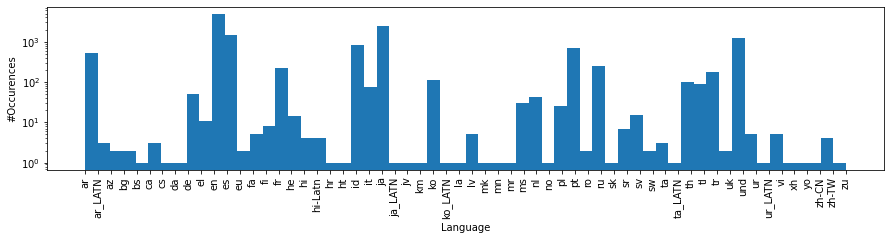

In [71]:
data_exploration(test_data, 'Test data')

In [ ]:
Part 